# ML Project

> By Arad Mahdinejad Kashani, **Student No. 400102028**

## 2. Data Analysis
### 2.1 Reading the data

In [192]:
import pandas as pd

df = pd.read_csv('train_data.csv')
df.head()

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,60,F,Bach,4,4,4759451,R,False,Accept
1,1,60,F,Bach,4,4,4759451,R,False,Accept
2,2,76,M,Bach,8,8,8237019,R,True,Accept
3,3,28,M,Ad. Dip,4,4,9114804,R,False,Accept
4,4,44,M,Ad. Dip,16,5,998868,R,False,Reject


In [193]:
df.columns

Index(['Id', 'Age', 'MF', 'LoE', 'YoW', 'YoCW', 'Income', 'Housing', 'Car',
       'Res'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       2000 non-null   int64 
 1   Age      2000 non-null   int64 
 2   MF       2000 non-null   object
 3   LoE      1990 non-null   object
 4   YoW      2000 non-null   int64 
 5   YoCW     2000 non-null   int64 
 6   Income   2000 non-null   int64 
 7   Housing  1990 non-null   object
 8   Car      1990 non-null   object
 9   Res      2000 non-null   object
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


In [195]:
df.shape

(2000, 10)

### 2.2 Preprocessing
#### Outliers
Removing the `NaN` values:

In [196]:
df.dropna(inplace=True)
df

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,60,F,Bach,4,4,4759451,R,False,Accept
1,1,60,F,Bach,4,4,4759451,R,False,Accept
2,2,76,M,Bach,8,8,8237019,R,True,Accept
3,3,28,M,Ad. Dip,4,4,9114804,R,False,Accept
4,4,44,M,Ad. Dip,16,5,998868,R,False,Reject
...,...,...,...,...,...,...,...,...,...,...
1995,1995,61,M,Dip,9,4,5316246,R,True,Accept
1996,1996,50,M,Ad. Dip,3,3,2062048,R,True,Reject
1997,1997,52,M,Mst,8,6,5811902,R,False,Accept
1998,1998,41,M,Doct,15,14,5866909,R,False,Accept


30 rows were deleted.
Outlier removal (Boxing the data between the 95% percentile):

In [197]:
income_95th_percentile = df['Income'].quantile(0.98)
df = df[df['Income'] <= income_95th_percentile]
age_95th_percentile = df['Age'].quantile(0.98)
df = df[df['Age'] <= age_95th_percentile]
df

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,60,F,Bach,4,4,4759451,R,False,Accept
1,1,60,F,Bach,4,4,4759451,R,False,Accept
2,2,76,M,Bach,8,8,8237019,R,True,Accept
3,3,28,M,Ad. Dip,4,4,9114804,R,False,Accept
4,4,44,M,Ad. Dip,16,5,998868,R,False,Reject
...,...,...,...,...,...,...,...,...,...,...
1995,1995,61,M,Dip,9,4,5316246,R,True,Accept
1996,1996,50,M,Ad. Dip,3,3,2062048,R,True,Reject
1997,1997,52,M,Mst,8,6,5811902,R,False,Accept
1998,1998,41,M,Doct,15,14,5866909,R,False,Accept


We lost more rows...

#### Numeralization

In [198]:
df_processed = pd.DataFrame(df)

df_processed['MF'] = df['MF'].map({'M': 1, 'F': 0})

education_mapping = {'Ad. Dip': 1, 'Dip': 2, 'Bach': 3, 'Mst': 4, 'Doct': 5, 'P. Doct': 6}
df_processed['LoE'] = df['LoE'].map(education_mapping)

housing_mapping = {'N': 0, 'R': 1, 'O': 2}
df_processed['Housing'] = df['Housing'].map(housing_mapping)

df_processed['Car'] = df['Car'].map({True: 1, False: 0})

df_processed['Res'] = df['Res'].map({'Accept': 1, 'Reject': 0})

df_processed

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,60,0,3,4,4,4759451,1,0,1
1,1,60,0,3,4,4,4759451,1,0,1
2,2,76,1,3,8,8,8237019,1,1,1
3,3,28,1,1,4,4,9114804,1,0,1
4,4,44,1,1,16,5,998868,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,1995,61,1,2,9,4,5316246,1,1,1
1996,1996,50,1,1,3,3,2062048,1,1,0
1997,1997,52,1,4,8,6,5811902,1,0,1
1998,1998,41,1,5,15,14,5866909,1,0,1


#### Normalization
I will min-max normalization.

In [199]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Age', 'YoW', 'YoCW', 'Income']
scaler = MinMaxScaler()

df_processed[numerical_columns] = scaler.fit_transform(df_processed[numerical_columns])

df_processed

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,0.684211,0,3,0.20,0.285714,0.487087,1,0,1
1,1,0.684211,0,3,0.20,0.285714,0.487087,1,0,1
2,2,0.964912,1,3,0.40,0.571429,0.843185,1,1,1
3,3,0.122807,1,1,0.20,0.285714,0.933069,1,0,1
4,4,0.403509,1,1,0.80,0.357143,0.102008,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,1995,0.701754,1,2,0.45,0.285714,0.544102,1,1,1
1996,1996,0.508772,1,1,0.15,0.214286,0.210876,1,1,0
1997,1997,0.543860,1,4,0.40,0.428571,0.594857,1,0,1
1998,1998,0.350877,1,5,0.75,1.000000,0.600489,1,0,1


### 2.3 Data Visualization

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


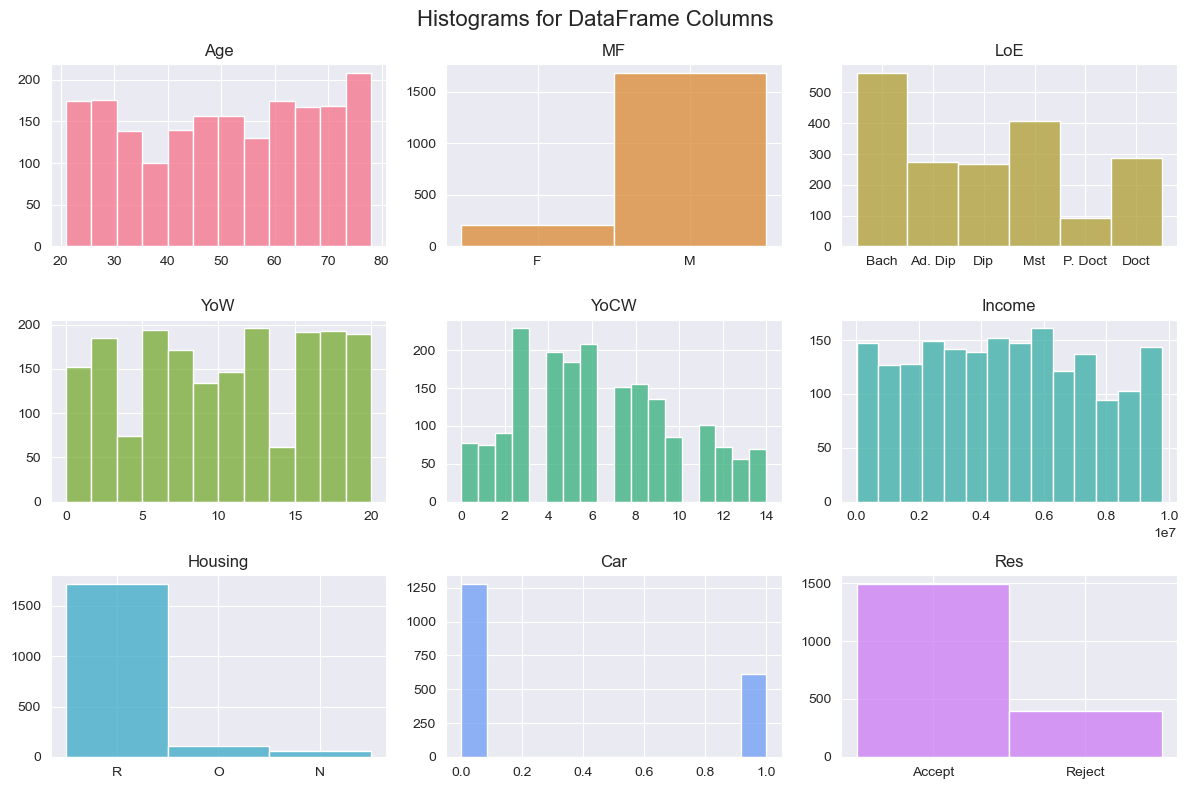

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig.suptitle("Histograms for DataFrame Columns", fontsize=16)

columns = ['Age', 'MF', 'LoE', 'YoW', 'YoCW', 'Income', 'Housing', 'Car', 'Res']
custom_palette = sns.color_palette("husl", n_colors=len(df.columns))

for i, col_name in enumerate(columns):
    row, col = divmod(i, 3)
    sns.histplot(df[col_name], ax=axes[row, col], color=custom_palette[i])
    axes[row, col].set_title(col_name)
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("")

plt.tight_layout()
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


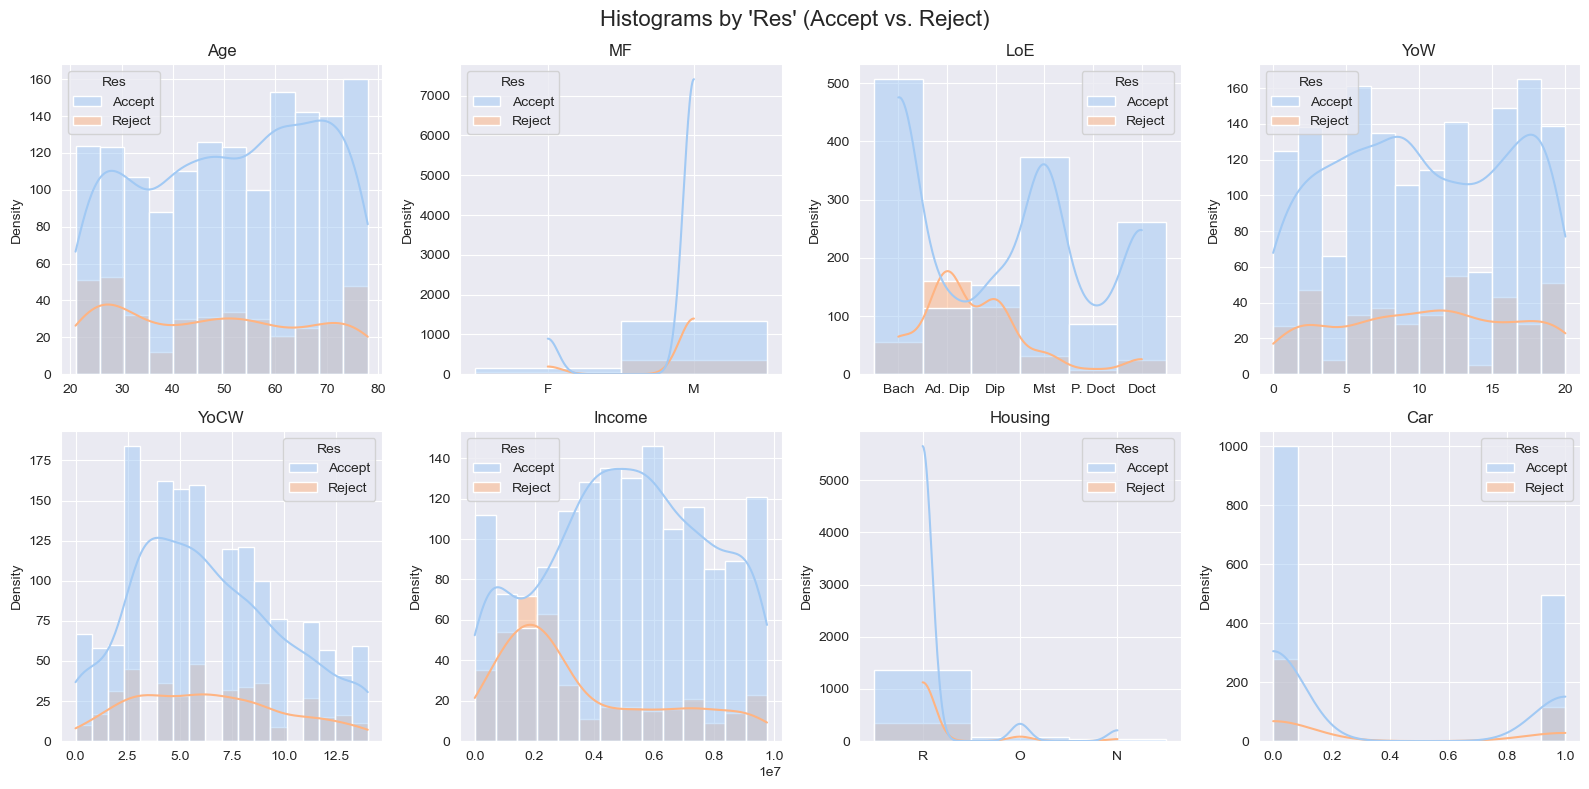

In [201]:
sns.set_style("darkgrid")

columns = ['Age', 'MF', 'LoE', 'YoW', 'YoCW', 'Income', 'Housing', 'Car']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Histograms by 'Res' (Accept vs. Reject)", fontsize=16)

for i, col_name in enumerate(columns):
    row, col = divmod(i, 4)
    sns.histplot(data=df, x=col_name, hue='Res', ax=axes[row, col], kde=True, palette='pastel')
    axes[row, col].set_title(col_name)
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Density")

plt.tight_layout()
plt.show()

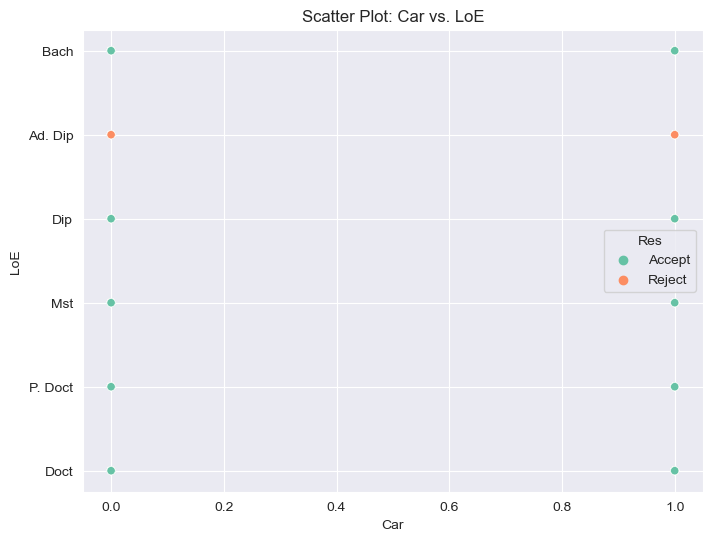

Correlation coefficient between Car and LoE: -0.0469


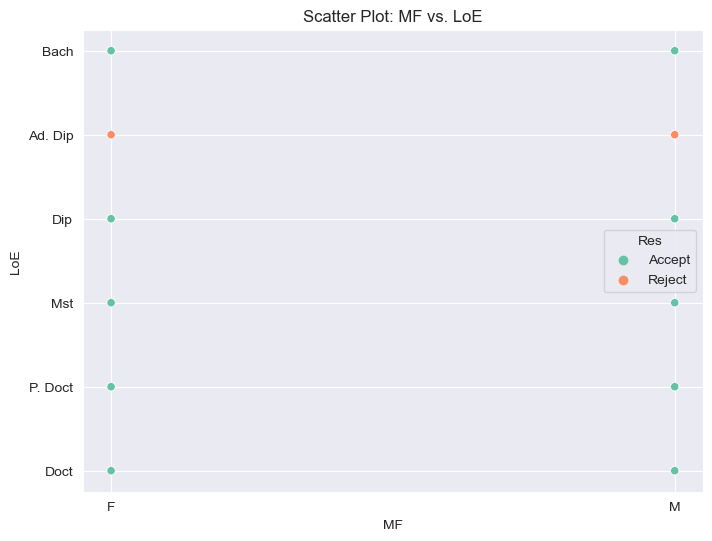

Correlation coefficient between MF and LoE: -0.0006


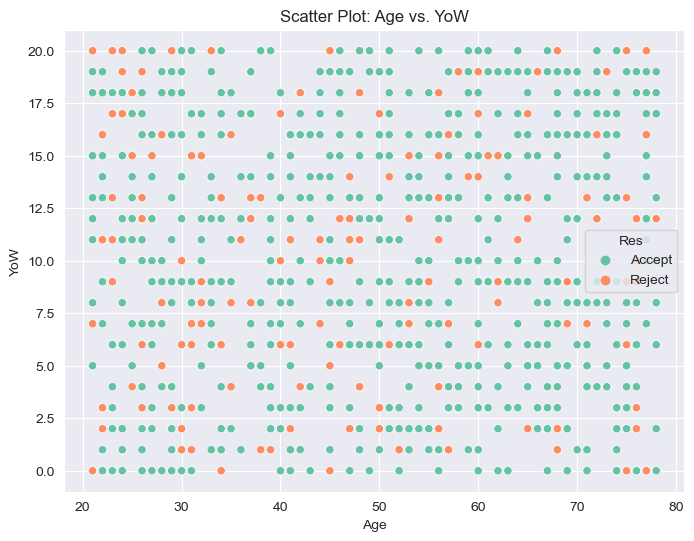

Correlation coefficient between Age and YoW: 0.0181


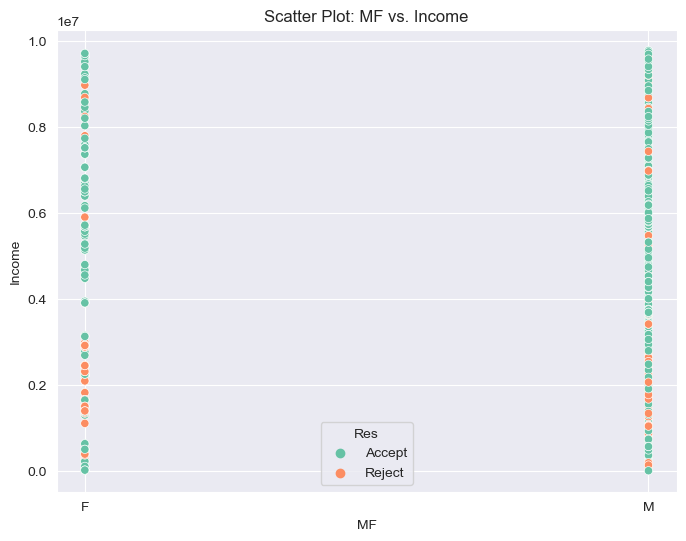

Correlation coefficient between MF and Income: 0.0159


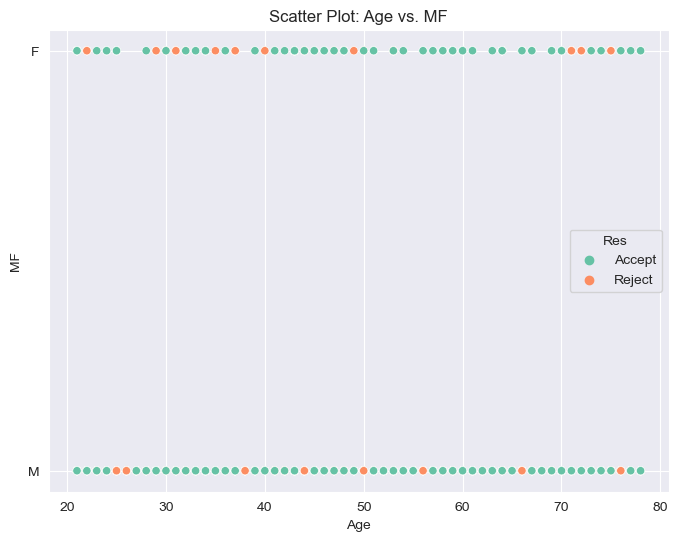

Correlation coefficient between Age and MF: 0.0045


In [202]:
import random

sns.set_style("darkgrid")

columns_to_plot = ['Age', 'MF', 'LoE', 'YoW', 'YoCW', 'Income', 'Housing', 'Car']

for _ in range(5):
    feature1, feature2 = random.sample(columns_to_plot, 2)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='Res', palette='Set2')
    plt.title(f"Scatter Plot: {feature1} vs. {feature2}")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Res')
    plt.show()

    correlation_coefficient = df_processed[[feature1, feature2]].corr().iloc[0, 1]
    # correlation coefficient is calculated on processed data, visualization is on unprocessed
    print(f"Correlation coefficient between {feature1} and {feature2}: {correlation_coefficient:.4f}")


### 2.4 Analysis

> "People with more LoE have more Res."

In [203]:
from scipy.stats import pearsonr
from scipy.stats import t

r, _ = pearsonr(df_processed['LoE'], df_processed['Res'])

n = len(df_processed)
t_score = r * (n - 2) ** 0.5 / (1 - r**2) ** 0.5

p_value = 2 * (1 - t.cdf(abs(t_score), df=n-2))

if p_value < 0.05:
    print(f"Correlation between 'LoE' and 'Res' is statistically significant (p-value: {p_value:.4f})")
else:
    print(f"Correlation between 'LoE' and 'Res' is not statistically significant (p-value: {p_value:.4f})")


Correlation between 'LoE' and 'Res' is statistically significant (p-value: 0.0000)


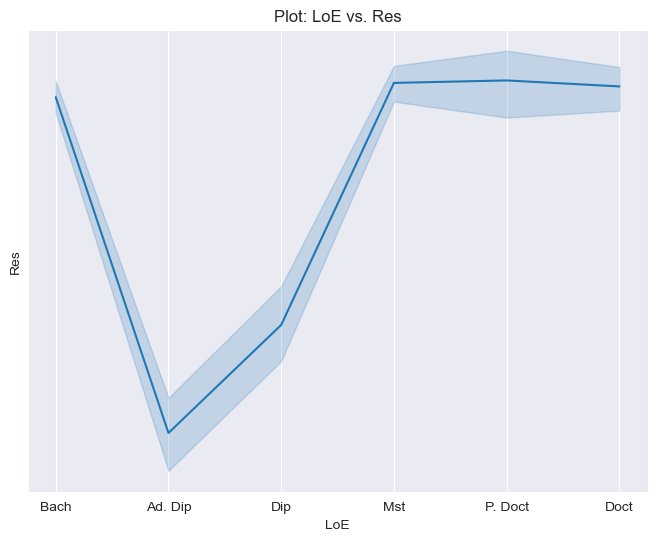

Correlation coefficient between LoE and Res: 0.4003


In [209]:
feature1,feature2 = ('LoE','Res')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x=feature1, y=feature2)
plt.title(f"Plot: {feature1} vs. {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

correlation_coefficient = df_processed[[feature1, feature2]].corr().iloc[0, 1]
print(f"Correlation coefficient between {feature1} and {feature2}: {correlation_coefficient:.4f}")

> "Generally, people with more income own houses or have a car."

In [207]:
from scipy.stats import ttest_ind

# Income vs. Housing
income_own = df_processed[df_processed['Housing'] == 2]['Income']
income_no_own = df_processed[df_processed['Housing'] != 2]['Income']
t_statistic_income_housing, p_value_income_housing = ttest_ind(income_own, income_no_own)

# Income vs. Car
income_own = df_processed[df_processed['Car'] == 1]['Income']
income_no_own = df_processed[df_processed['Car'] == 0]['Income']
t_statistic_income_car, p_value_income_car = ttest_ind(income_own, income_no_own)

print(f"Income vs. Housing:")
print(f"  t-statistic: {t_statistic_income_housing:.4f}, p-value: {p_value_income_housing:.4f}")
print(f"Income vs. Car:")
print(f"  t-statistic: {t_statistic_income_car:.4f}, p-value: {p_value_income_car:.4f}")

Income vs. Housing:
  t-statistic: 2.6027, p-value: 0.0093
Income vs. Car:
  t-statistic: 0.0894, p-value: 0.9288


Interesting! The statement for `Housing` is acceptable with a good p-value, but **not at all** for `Car` ownership, not at least in this dataset.

> "People who have not changed their job in the past 5 years have more 'Res'."

1. **Group 1 (No Job Change)**: Individuals who have not changed their job in the past 5 years.
2. **Group 2 (Job Change)**: Individuals who have changed their job in the past 5 years.

* Null Hypothesis $H_0$: There is no significant difference in `YoCW` between the two groups.
* Alternative Hypothesis $H_1$: There is a significant difference in `YoCW` between the two groups.

In [213]:
no_job_change = df[df['YoCW'] >= 5]['Res']
job_change = df[df['YoCW'] < 5]['Res']

t_statistic, p_value = ttest_ind(no_job_change, job_change)

if p_value < 0.05:
    print(f"Statement: People who have not changed their job in the past 5 years have more validity (Res).")
    print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f} (statistically significant)")
else:
    print(f"Statement: People who have not changed their job in the past 5 years do not significantly differ in validity (Res).")
    print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")


Statement: People who have not changed their job in the past 5 years do not significantly differ in validity (Res).
  t-statistic: -0.1126, p-value: 0.9104


> "Men (males) with an age of more than 50 are less likely to be validated (Res) than men under the age of 30."

1. **Group 1 (Age > 50)**
2. **Group 2 (Age < 30)**

* **Null Hypothesis $H_0$\:** There is no significant difference in `Res` between the two age groups.
* **Alternative Hypothesis $H_1$:** There is a significant difference in `Res` between the two age groups.


$ t = \frac{{r \sqrt{n-2}}}{{\sqrt{1-r^2}}} $

In [220]:
men_over_50 = df[(df['MF'] == 1) & (df['Age'] > 50)]['Res']
men_under_30 = df[(df['MF'] == 1) & (df['Age'] < 30)]['Res']

t_statistic, p_value = ttest_ind(men_over_50, men_under_30)

if p_value < 0.05:
    print("Statement: Men over 50 are less likely to be validated (Res) than men under 30.")
    print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f} (statistically significant)")
else:
    print("Statement: There is no significant difference in validation (Res) between men over 50 and men under 30.")
    print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

Statement: Men over 50 are less likely to be validated (Res) than men under 30.
  t-statistic: 4.3625, p-value: 0.0000 (statistically significant)


> "Men have more income than women."

Here's how we can proceed:

* **Null Hypothesis $H_0$:** There is no significant difference in income between men and women
* **Alternative Hypothesis $H_1$:** There is a significant difference in income between men and women

In [222]:
men_income = df[df['MF'] == 1]['Income']
women_income = df[df['MF'] == 0]['Income']

t_statistic, p_value = ttest_ind(men_income, women_income)

if p_value < 0.05:
    print("Statement: Men have more income than women.")
    print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f} (statistically significant)")
else:
    print("Statement: There is no significant difference in income between men and women.")
    print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")


Statement: There is no significant difference in income between men and women.
  t-statistic: 0.6915, p-value: 0.4893


## 3. Training & Testing the Model
### 3.1 Choosing the model and hyperparameters

In [238]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df_processed.drop(columns=['Res', 'Id'])
y = df_processed['Res']

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluating each model using k-fold cross-validation
k_fold = 5
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
    results[model_name] = {'mean_accuracy': scores.mean(), 'variance': scores.var()}

for model_name, metrics in results.items():
    print(f"{model_name}: Mean Accuracy = {metrics['mean_accuracy']:.4f}, Variance = {metrics['variance']:.4f}")

Logistic Regression: Mean Accuracy = 0.8472, Variance = 0.0004
KNN: Mean Accuracy = 0.8631, Variance = 0.0007
Decision Tree: Mean Accuracy = 0.8800, Variance = 0.0002
Random Forest: Mean Accuracy = 0.9016, Variance = 0.0003
SVM: Mean Accuracy = 0.8419, Variance = 0.0003


It seems Random Forests are the way to go.

In [240]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

final_rf_model = RandomForestClassifier(**best_params)
final_rf_model.fit(X_train, y_train)

val_accuracy = final_rf_model.score(X_val, y_val)
print(f"Validation Accuracy (Random Forest): {val_accuracy:.4f}")
print("Best Hyperparameters:")
print(best_params)

Validation Accuracy (Random Forest): 0.8997
Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}


### 3.2 Training the model and evaluation

Mean Accuracy: 0.9119, Variance: 0.0002
Mean Precision: 0.9190, Variance: 0.0002
Mean Recall: 0.9730, Variance: 0.0001
Mean F1-score: 0.9452, Variance: 0.0001
Mean AUPRC: 0.9153, Variance: 0.0002
Mean Training Time: 2.0216, Variance: 0.0300


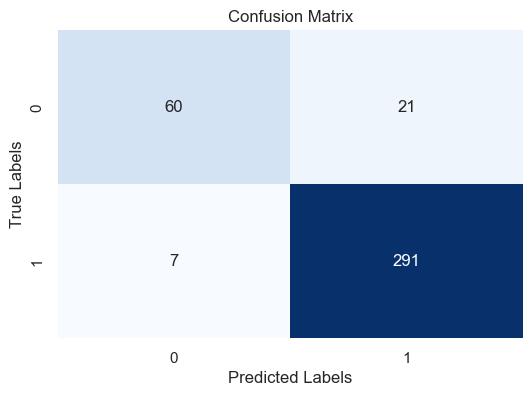

In [244]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, confusion_matrix
import time

rf_model = RandomForestClassifier(**best_params)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auprc_scores = []
training_times = []

for random_state in range(1, 6):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

    start_time = time.time()
    rf_model.fit(X_train, y_train)
    end_time = time.time()
    training_times.append(end_time - start_time)

    y_pred = rf_model.predict(X_val)

    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auprc_scores.append(average_precision_score(y_val, y_pred))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_auprc = np.mean(auprc_scores)
mean_training_time = np.mean(training_times)

var_accuracy = np.var(accuracy_scores)
var_precision = np.var(precision_scores)
var_recall = np.var(recall_scores)
var_f1 = np.var(f1_scores)
var_auprc = np.var(auprc_scores)
var_training_time = np.var(training_times)

print(f"Mean Accuracy: {mean_accuracy:.4f}, Variance: {var_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}, Variance: {var_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}, Variance: {var_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}, Variance: {var_f1:.4f}")
print(f"Mean AUPRC: {mean_auprc:.4f}, Variance: {var_auprc:.4f}")
print(f"Mean Training Time: {mean_training_time:.4f}, Variance: {var_training_time:.4f}")

conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

My laptop is weak, and hot. This is why the training time is a bit high (2 seconds). I would like to ask you to run this yourself if need be, and your time will probably be faster than mine.

The confusion matrix looks good to me. Other metrics too.

**Accuracy** is almost never a good enough indicator of model performance. Some phenomena such as class imbalance and anomaly detection deprecate the use of *"just"* accuracy, and the use of other metrics become necessary to describe the model performance.

When summarizing model performance with a single metric, especially considering class imbalance, the **Area Under the Receiver Operating Characteristic Curve (AUC-ROC)** is a good choice, because:

**AUC-ROC:**
   - Measures the overall ability of the model to discriminate between positive and negative classes.
   - Aggregates performance across different probability thresholds.
   - Robust to class imbalance because it considers the entire ROC curve.
   - Values range from 0.5 (random guessing) to 1.0 (perfect separation).

AUC-ROC provides a holistic view of model performance, considering both true positive rate (recall) and false positive rate.

However, you did not provide this metric in the evaluation methods for the model in the documentation. Instead, we have to use **AUPRC**; but AUPRC is not class imbalance independent, like AUC is.

## 3.3 Testing the model

In [250]:
df_test = pd.read_csv('test_data_1.csv')
df_test.head()

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car
0,2000,71,F,Bach,14,12,3941355,R,False
1,2001,32,F,Ad. Dip,10,10,4552514,R,True
2,2002,77,M,Doct,19,6,510754,R,False
3,2003,55,M,Mst,8,8,8830734,R,True
4,2004,39,M,Bach,7,7,7861257,R,True


In [251]:
df_processed_test = pd.DataFrame(df_test)

df_processed_test['MF'] = df_test['MF'].map({'M': 1, 'F': 0})

education_mapping = {'Ad. Dip': 1, 'Dip': 2, 'Bach': 3, 'Mst': 4, 'Doct': 5, 'P. Doct': 6}
df_processed_test['LoE'] = df_test['LoE'].map(education_mapping)

housing_mapping = {'N': 0, 'R': 1, 'O': 2}
df_processed_test['Housing'] = df_test['Housing'].map(housing_mapping)

df_processed_test['Car'] = df_test['Car'].map({True: 1, False: 0})

df_processed_test

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car
0,2000,71,0,3,14,12,3941355,1,0
1,2001,32,0,1,10,10,4552514,1,1
2,2002,77,1,5,19,6,510754,1,0
3,2003,55,1,4,8,8,8830734,1,1
4,2004,39,1,3,7,7,7861257,1,1
...,...,...,...,...,...,...,...,...,...
495,2495,71,1,4,8,7,5300443,1,1
496,2496,79,1,6,20,6,2415720,1,0
497,2497,41,1,3,6,6,4531094,1,0
498,2498,28,1,5,12,12,9846056,1,0


In [253]:
numerical_columns = ['Age', 'YoW', 'YoCW', 'Income']

df_processed_test[numerical_columns] = scaler.transform(df_processed_test[numerical_columns])

df_processed_test

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car
0,2000,0.877193,0,3,0.70,0.857143,0.403315,1,0
1,2001,0.192982,0,1,0.50,0.714286,0.465897,1,1
2,2002,0.982456,1,5,0.95,0.428571,0.052026,1,0
3,2003,0.596491,1,4,0.40,0.571429,0.903981,1,1
4,2004,0.315789,1,3,0.35,0.500000,0.804708,1,1
...,...,...,...,...,...,...,...,...,...
495,2495,0.877193,1,4,0.40,0.500000,0.542484,1,1
496,2496,1.017544,1,6,1.00,0.428571,0.247092,1,0
497,2497,0.350877,1,3,0.30,0.428571,0.463703,1,0
498,2498,0.122807,1,5,0.60,0.857143,1.007949,1,0


The test data is now processed just like the training data, with the same `MinMaxScaler` used for the training data. We may now predict:

In [257]:
X_test = df_processed_test.drop(columns=['Id'])
y_pred_test = rf_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Next we will output the `.txt` file with each label in a single line.

In [259]:
output_file_path = "y_test.txt"

with open(output_file_path, "w") as file:
    for label in y_pred_test:
        file.write(f"{label}\n")

print(f"Labels saved to {output_file_path}")

Labels saved to y_test.txt


## 4. Model Simplification
### Correlation and feature removal

In [266]:
X

,Age,MF,LoE,YoW,YoCW,Income,Housing,Car
0,0.684211,0,3,0.20,0.285714,0.487087,1,0
1,0.684211,0,3,0.20,0.285714,0.487087,1,0
2,0.964912,1,3,0.40,0.571429,0.843185,1,1
3,0.122807,1,1,0.20,0.285714,0.933069,1,0
4,0.403509,1,1,0.80,0.357143,0.102008,1,0
...,...,...,...,...,...,...,...,...
1995,0.701754,1,2,0.45,0.285714,0.544102,1,1
1996,0.508772,1,1,0.15,0.214286,0.210876,1,1
1997,0.543860,1,4,0.40,0.428571,0.594857,1,0
1998,0.350877,1,5,0.75,1.000000,0.600489,1,0


In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
auprc = average_precision_score(y_valid, y_pred_proba)

low_corr_features = []

features= ['Age', 'MF', 'LoE', 'YoW', 'YoCW', 'Income', 'Housing', 'Car']
for feature in features:
    X_temp = X_train.drop(columns=[feature])
    
    model = RandomForestClassifier(**best_params)
    model.fit(X_temp, y_train)
    y_pred_proba_temp = model.predict_proba(X_valid.drop(columns=[feature]))[:, 1]
    auprc_temp = average_precision_score(y_valid, y_pred_proba_temp)
    print(f'AUPRC for removing feature {feature} is {auprc_temp}')
    if auprc_temp < 0.8:
        low_corr_features.append(feature)

print(f'Original AUPRC = {auprc}')
print("Features with AUPRC < 0.8 when removed:", low_corr_features)

AUPRC for removing feature Age is 0.9723293147683507
AUPRC for removing feature MF is 0.9711765212285353
AUPRC for removing feature LoE is 0.9718554896487595
AUPRC for removing feature YoW is 0.9706014894874657
AUPRC for removing feature YoCW is 0.9667368394575063
AUPRC for removing feature Income is 0.9641850283738645
AUPRC for removing feature Housing is 0.9757421053458221
AUPRC for removing feature Car is 0.9715110392332356
Original AUPRC = 0.9729209694982208
Features with AUPRC < 0.8 when removed: []


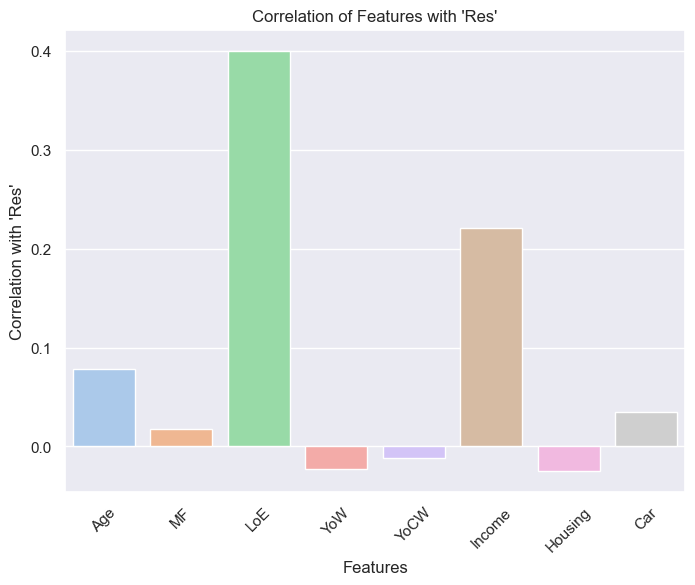

In [282]:
sns.set_style('darkgrid')
correlation_matrix = df_processed.drop('Id', axis=1).corr()

res_corr_row = correlation_matrix.loc['Res'].drop('Res')

plt.figure(figsize=(8, 6))
sns.barplot(x=res_corr_row.index, y=res_corr_row.values, palette='pastel')
plt.xlabel("Features")
plt.ylabel("Correlation with 'Res'")
plt.title("Correlation of Features with 'Res'")
plt.xticks(rotation=45)
plt.show()


I think we can go as far as removing all features except `Age`, `LoE`, `Income` and `Car`.

In [283]:
X_train, X_valid, y_train, y_valid = train_test_split(X[['Age', 'LoE', 'Income', 'Car']], y, test_size=0.2, random_state=42)

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
auprc = average_precision_score(y_valid, y_pred_proba)
print(f'AURPC is {auprc}')

AURPC is 0.9651732065229013


Well maybe remove car too!

In [285]:
X_train, X_valid, y_train, y_valid = train_test_split(X[['Age', 'LoE', 'Income']], y, test_size=0.2, random_state=42)

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
auprc = average_precision_score(y_valid, y_pred_proba)
print(f'AURPC is {auprc}')

AURPC is 0.9701321509927483


Maybe age as well?

In [286]:
X_train, X_valid, y_train, y_valid = train_test_split(X[['LoE', 'Income']], y, test_size=0.2, random_state=42)

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
auprc = average_precision_score(y_valid, y_pred_proba)
print(f'AURPC is {auprc}')

AURPC is 0.961213506546411


I did not expect to just train on Level of Education...

In [287]:
X_train, X_valid, y_train, y_valid = train_test_split(X[['LoE']], y, test_size=0.2, random_state=42)

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
auprc = average_precision_score(y_valid, y_pred_proba)
print(f'AURPC is {auprc}')

AURPC is 0.8850593825884111


Honestly this is very surprising to me. Apparently the answer to the first part is "only `LoE`"!
Let's also check for other metrics:

In [289]:
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1_score = f1_score(y_valid, y_pred)

print(f'{accuracy = }')
print(f'{precision = }')
print(f'{recall = }')
print(f'{f1_score = }')

accuracy = 0.8073878627968337
precision = 0.844776119402985
recall = 0.930921052631579
f1_score = 0.8857589984350548



### Dimensionality Reduction

In [294]:
from sklearn.decomposition import PCA

n_components = X.shape[1]  # Start with full dimensionality
auprc_threshold = 0.8
best_auprc = 0
best_dim = None

while n_components > 1:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(**best_params)
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auprc = average_precision_score(y_test, y_pred_proba)

    if auprc < auprc_threshold:
        print(f'AUPRC reached {auprc} at dimensionality {n_components}')
        break  # Stop if AUPRC goes below threshold
    elif auprc > best_auprc:
        best_auprc = auprc
        best_dim = n_components

    n_components -= 1
else:
    print(f'PCA with dimensions {n_components} still works with AUPRC {auprc}!')

print(f"Best AUPRC ({best_dim} dimensions): {best_auprc:.4f}")

PCA with dimensions 1 still works with AUPRC 0.9395848848633137!
Best AUPRC (6 dimensions): 0.9699


It's still 1!

## 6. Ensemble Methods
### 6.1 Different Data

In [331]:
from collections import Counter
    
def max_vote(weak_learners, X):
    return np.round(sum(clf.predict(X) for clf in weak_learners) / len(weak_learners))

In [332]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, f1_score

n_splits = 5 

n_weak_learners = [5, 10, 20]
models = [DecisionTreeClassifier(), LogisticRegression(), SVC(probability=True)]

grid = {}
for n_learners in n_weak_learners:
    for model in models:
        accuracy_list, recall_list, precision_list, auprc_list, f1_list = [], [], [], [], []
        for _ in range(n_splits):
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))
            weak_learners = [model for _ in range(n_learners)]

            X_train_learner = np.array_split(X_train, n_learners)
            y_train_learner = np.array_split(y_train, n_learners)
            for i,clf in enumerate(weak_learners):
               clf.fit(X_train_learner[i], y_train_learner[i])

            y_ensemble = max_vote(weak_learners, X_val)

            accuracy = accuracy_score(y_val, y_ensemble)
            recall = recall_score(y_val, y_ensemble)
            precision = precision_score(y_val, y_ensemble)
            auprc = average_precision_score(y_val, y_ensemble)
            f1 = f1_score(y_val, y_ensemble)
                
            accuracy_list.append(accuracy)
            recall_list.append(recall)
            precision_list.append(precision)
            auprc_list.append(auprc)
            f1_list.append(f1)
            
        accuracy_mean = np.mean(accuracy_list)
        accuracy_var = np.var(accuracy_list)
        recall_mean = np.mean(recall_list)
        recall_var = np.var(recall_list)
        precision_mean = np.mean(precision_list)
        precision_var = np.var(precision_list)
        auprc_mean = np.mean(auprc_list)
        auprc_var = np.var(auprc_list)
        f1_mean = np.mean(f1_list)
        f1_var = np.var(f1_list)
                

        key = (n_learners, model)
        value = {
            'accuracy': (accuracy_mean, accuracy_var),
            'recall': (recall_mean, recall_var),
            'precision': (precision_mean, precision_var),
            'auprc': (auprc_mean, auprc_var),
            'f1': (f1_mean, f1_var)
        }
        grid[key] = value
            

grid

{(5,
  DecisionTreeClassifier()): {'accuracy': (0.8258575197889181,
   0.0006989647802507645), 'recall': (0.8800329501581823,
   0.0005607292504460611), 'precision': (0.9001899520324225,
   0.00023578731206627923), 'auprc': (0.8885095757471136,
   0.00027604724310745433), 'f1': (0.889923093109771, 0.00033889268546889685)},
 (5,
  LogisticRegression()): {'accuracy': (0.8480211081794196,
   0.000438871909830758), 'recall': (0.9732096289286142,
   2.448489043660734e-05), 'precision': (0.854694545751079,
   0.0004315396949193354), 'auprc': (0.8529240356875301,
   0.00042140246967391014), 'f1': (0.9099797464255776,
   0.00015463987749585073)},
 (5,
  SVC(probability=True)): {'accuracy': (0.8321899736147758,
   0.00026343453470805734), 'recall': (0.9602160826842452,
   0.0005685800210574277), 'precision': (0.8507775462932772,
   0.000545221947567144), 'auprc': (0.8482284077210498,
   0.0004979029898909201), 'f1': (0.9016832409461077, 0.00010201866923072226)},
 (10,
  DecisionTreeClassifier()

In [333]:
best_key = None
best_auprc_mean = float('-inf')  # Initialize with negative infinity

for key, value in grid.items():
    auprc_mean = value['auprc'][0]
    if auprc_mean > best_auprc_mean:
        best_auprc_mean = auprc_mean
        best_key = key

print(f"Best key with highest AUPRC mean: {best_key}")

Best key with highest AUPRC mean: (5, DecisionTreeClassifier())


We kind of knew it all along though.

In [334]:
for score,(mean,var) in grid[best_key].items():
    print(f'{score} score: {mean=:.4f} & {var=:.4f}')

accuracy score: mean=0.8259 & var=0.0007
recall score: mean=0.8800 & var=0.0006
precision score: mean=0.9002 & var=0.0002
auprc score: mean=0.8885 & var=0.0003
f1 score: mean=0.8899 & var=0.0003


### Feature Division

In [335]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, f1_score

def max_vote_modified_X(weak_learners, X, N):
    X_modified = np.array_split(X, N, axis=1)
    return np.round(sum(clf.predict(X_modified[i]) for i,clf in enumerate(weak_learners)) / len(weak_learners))


n_splits = 5 

n_weak_learners = [2,3,4]
models = [DecisionTreeClassifier, LogisticRegression, SVC]

grid = {}
for n_learners in n_weak_learners:
    for model in models:
        accuracy_list, recall_list, precision_list, auprc_list, f1_list = [], [], [], [], []
        for _ in range(n_splits):
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))
            weak_learners = [model() for _ in range(n_learners)]

            X_train_learner = np.array_split(X_train, n_learners,axis=1)
            for i,clf in enumerate(weak_learners):
               clf.fit(X_train_learner[i], y_train)

            y_ensemble = max_vote_modified_X(weak_learners, X_val, n_learners)

            accuracy = accuracy_score(y_val, y_ensemble)
            recall = recall_score(y_val, y_ensemble)
            precision = precision_score(y_val, y_ensemble)
            auprc = average_precision_score(y_val, y_ensemble)
            f1 = f1_score(y_val, y_ensemble)
                
            accuracy_list.append(accuracy)
            recall_list.append(recall)
            precision_list.append(precision)
            auprc_list.append(auprc)
            f1_list.append(f1)
            
        accuracy_mean = np.mean(accuracy_list)
        accuracy_var = np.var(accuracy_list)
        recall_mean = np.mean(recall_list)
        recall_var = np.var(recall_list)
        precision_mean = np.mean(precision_list)
        precision_var = np.var(precision_list)
        auprc_mean = np.mean(auprc_list)
        auprc_var = np.var(auprc_list)
        f1_mean = np.mean(f1_list)
        f1_var = np.var(f1_list)
                

        key = (n_learners, model)
        value = {
            'accuracy': (accuracy_mean, accuracy_var),
            'recall': (recall_mean, recall_var),
            'precision': (precision_mean, precision_var),
            'auprc': (auprc_mean, auprc_var),
            'f1': (f1_mean, f1_var)
        }
        grid[key] = value
            

grid

{(2,
  sklearn.tree._classes.DecisionTreeClassifier): {'accuracy': (0.8343007915567282,
   0.0005469190551444237), 'recall': (0.8524048407020096,
   0.00044839109860310655), 'precision': (0.9358040637378636,
   0.00017948550766874852), 'auprc': (0.9166202836093124,
   0.00021453809075999185), 'f1': (0.8920905221526123, 0.0002714543885064675)},
 (2,
  sklearn.linear_model._logistic.LogisticRegression): {'accuracy': (0.8105540897097624,
   0.00014313462033820447), 'recall': (0.9296360647818812,
   0.0001840868538458516), 'precision': (0.8467733194393077,
   3.509930494400282e-05), 'auprc': (0.843153213660135,
   4.278919284522677e-05), 'f1': (0.8862283888690721, 6.146479091137774e-05)},
 (2,
  sklearn.svm._classes.SVC): {'accuracy': (0.8179419525065963,
   0.00023948594064368767), 'recall': (0.9192342503288341,
   0.0003253540760357632), 'precision': (0.8630597611238182,
   9.17252338687669e-05), 'auprc': (0.8582920421270291,
   0.00010079554861429425), 'f1': (0.8901658197490667,
   0.00

In [336]:
best_key = None
best_auprc_mean = float('-inf')  # Initialize with negative infinity

for key, value in grid.items():
    auprc_mean = value['auprc'][0]
    if auprc_mean > best_auprc_mean:
        best_auprc_mean = auprc_mean
        best_key = key

print(f"Best key with highest AUPRC mean: {best_key}")

Best key with highest AUPRC mean: (2, <class 'sklearn.tree._classes.DecisionTreeClassifier'>)


In [337]:
for score,(mean,var) in grid[best_key].items():
    print(f'{score} score: {mean=:.4f} & {var=:.4f}')

accuracy score: mean=0.8343 & var=0.0005
recall score: mean=0.8524 & var=0.0004
precision score: mean=0.9358 & var=0.0002
auprc score: mean=0.9166 & var=0.0002
f1 score: mean=0.8921 & var=0.0003
